In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://practicum-content.s3.us-west-1.amazonaws.com/datasets/segments.csv

data = pd.read_csv('segments.csv')

In [3]:
# Entrenar un modelo sin centroides iniciales
model = KMeans(n_clusters=3, random_state=12345, n_init=10)
model.fit(data)

print('Centroides de clúster:')
print(model.cluster_centers_, '\n')

print('Función objetivo:')
print(model.inertia_)

Centroides de clúster:
[[10.68632155 98.90275017 10.856     ]
 [40.14472236 15.00741697  8.56      ]
 [10.90357994 29.90244865 15.096     ]] 

Función objetivo:
68431.50999400373


In [4]:
# Centroides asignados
centers = np.array([[20, 80, 8], [50, 20, 5], [20, 30, 10]])

# Entrenar un modelo con centroides iniciales
model = KMeans(n_clusters=3, init=centers, random_state=12345, n_init=1)
model.fit(data)

print('Centroides de clúster del modelo con centroides iniciales:')
print(model.cluster_centers_, '\n')

print('La función objetivo del modelo con centroides iniciales:')
print(model.inertia_)

Centroides de clúster del modelo con centroides iniciales:
[[10.68632155 98.90275017 10.856     ]
 [50.06201472 19.62701512  1.808     ]
 [20.56550497 20.14513373 15.204     ]] 

La función objetivo del modelo con centroides iniciales:
74253.203635621


El centroide se mueve porque es la media aritmética de todos los puntos que le pertenecen. Parte calculando todas las distancias a los puntos asignados. De ahí saca la media, y así como encuentra el "centro de gravedad" de ese grupo de puntos.

Analogía: Si tienes 4 personas paradas en diferentes posiciones de una habitación, el "centro" del grupo estará en el promedio de sus posiciones, no necesariamente donde empezó una persona específica.

*Pasos para crear una gráfica de comparación:*

- Entrenar el modelo KMeans con centroides asignados
- Crear DataFrames separados:
    - Centroides iniciales con etiqueta numérica
    - Centroides finales con etiquetas descriptivas
    - Datos originales con etiquetas de clúster
- Combinar datos y centroides finales
- Crear el gráfico base con pairplot
- Añadir capa adicional con centroides iniciales
- Configurar marcadores y colores diferentes para cada elemento

**PairPlot** es una herramienta de Seaborn que crea una cuadrícula de subgráficos para visualizar relaciones entre múltiples variables. Es una matriz donde cada celda muestra la relación entre dos variables de tu dataset.

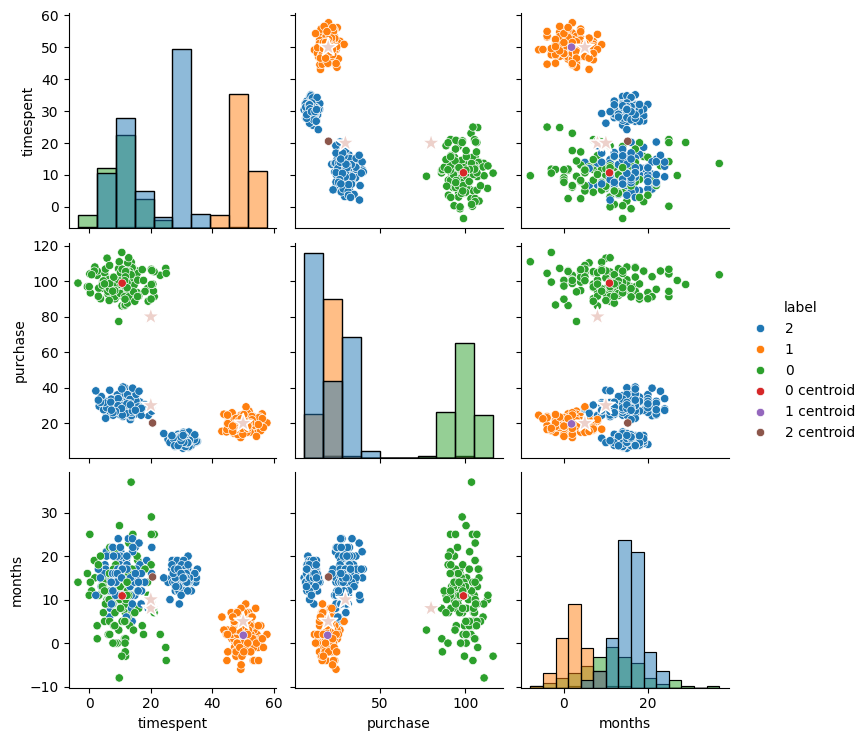

In [5]:
# 1. Centroides iniciales con etiqueta numérica
    # Se hace un df con los valores asignados inicialmente. Se añade una etiqueta numérica diferente a las
    # etiquetas de clúster (0, 1, 2, 3) para garantizar que tengan un color único en la paleta.
    # Estos centroides se añadirán como una capa adicional separada y no necesitan aparecer en la leyenda principal

centroids_init = pd.DataFrame(centers, columns=data.columns)
centroids_init['label'] = 4

# 2. Centroides finales con etiquetas descriptivas
    # model.cluster_centers_ arroja un array numpy, pero necesitamos un DataFrame para poder concatenarlo 
    # con los datos y usar las mismas columnas.
    # Se añaden etiquetas descriptivas para identificarlos 

centroids_final = pd.DataFrame(model.cluster_centers_, columns=data.columns)
centroids_final['label'] = ['0 centroid', '1 centroid', '2 centroid']

# 3. Datos originales con etiquetas de clúster
    # Guardar nombres originales de columnas (se usarán para los centroides)
    # Asignar a cada punto una etiqueta con número de clúster como string para colorear puntos
    # puntos según clúster en gráfico

data['label'] = model.labels_.astype(str)

# 4. Combina los datos originales con los centroides finales
    # Por qué: sns.pairplot() necesita todos los datos en un solo DataFrame
    # Se requiere una reconfiguración de índice para crear pairgrid.data

data_all = pd.concat([data, centroids_final], ignore_index=True)

# 5. Crear el gráfico base con pairplot con datos + centroides finales
    # Esta línea define el gráfico en sí
    # hue='label' colorea cada grupo diferente 
    # diag_kind='hist' pone histogramas en la diagonal

pairgrid = sns.pairplot(data_all, hue='label', diag_kind='hist')

# 6. Añadir una capa adicional con centroides iniciales

pairgrid.data = centroids_init

# 7. Añadir una segunda capa con los centroides iniciales como estrellas grandes
    # .map_offdiag() permite ver gráficos que NO están en la diagonal principal
        # func=sns.scatterplot: Usa gráficos de dispersión
        # s=200: Hace los puntos grandes (tamaño 200)
        # marker='*': Los puntos tienen forma de estrella
        # palette='flag': Usa una paleta de colores específica

pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')

### Método del Codo (Elbow Method)

,cluster,distortion
0,1,1.901667e+08
1,2,4.766962e+07
2,3,2.296428e+07
3,4,1.208624e+07
4,5,8.805084e+06
5,6,6.511520e+06
6,7,4.792264e+06


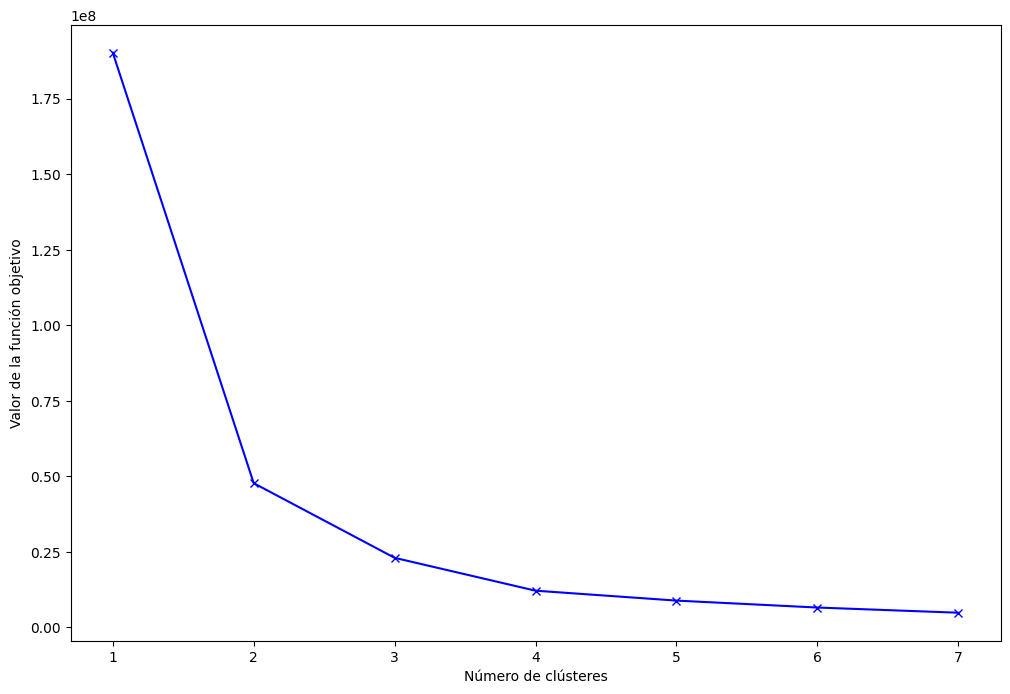

In [ ]:
# Función objetivo (aka distortion o inertia)

K = range(1, 8)
results = []

for k in K:
    model = KMeans(n_clusters=k, random_state=12345, n_init=10)
    model.fit(data)
    results.append({'cluster': k, 'distortion': model.inertia_})

distortion = pd.DataFrame(results)
display(distortion)

plt.figure(figsize=(12, 8))
plt.plot(K, distortion.distortion, 'bx-') 
    #'bx-': especifica el estilo del gráfico:
        # b: color azul (blue)
        # x: marcador en forma de X para cada punto
        # -: línea continua conectando los puntos
plt.xlabel('Número de clústeres')
plt.ylabel('Valor de la función objetivo')
plt.show()

   timespent   purchase  months label
0   9.749627  26.984142    14.0     3
1  30.416766   5.916530    15.0     0
2   8.809746  35.502827    14.0     3
3  31.418008   9.820529    18.0     0
4  48.279014  18.359423     2.0     2


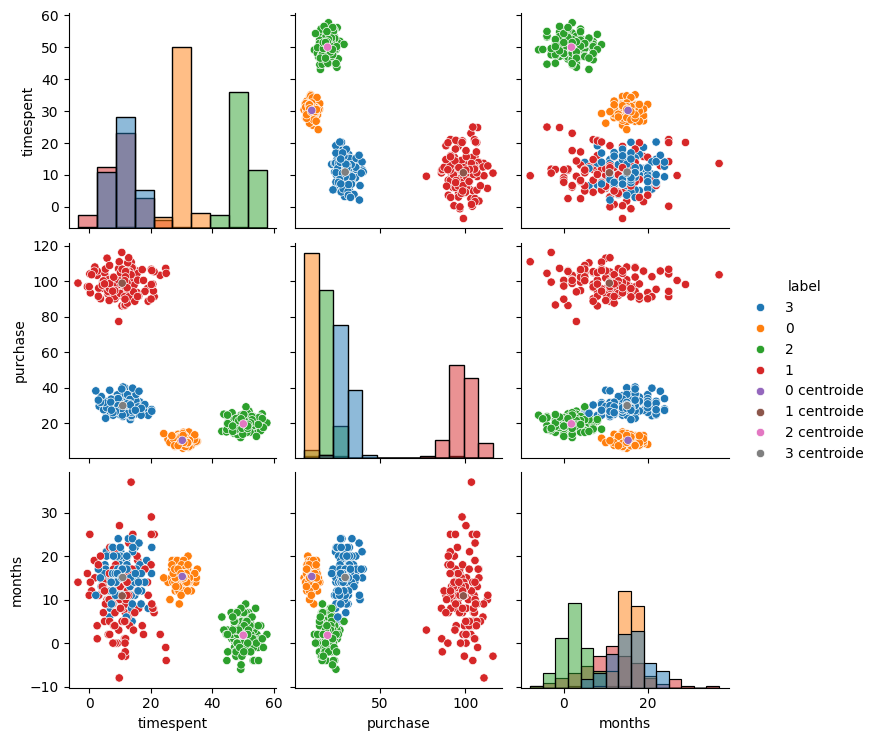

In [ ]:
model = KMeans(n_clusters=4, random_state=12345, n_init=10)

model.fit(data)

centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)
data['label'] = model.labels_.astype(str)
centroids['label'] = ['0 centroide', '1 centroide', '2 centroide', '3 centroide']
data_all = pd.concat([data, centroids], ignore_index=True)

# Traza el gráfico
sns.pairplot(data_all, hue='label', diag_kind='hist')

print(data.head())

In [ ]:
# https://practicum-content.s3.us-west-1.amazonaws.com/datasets/cars.csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv('cars.csv')

    mpg: consumo de combustible (millas por galón)
    cylinders: número de cilindros
    cubicinches: volumen del motor
    hp: potencia del motor (caballos de fuerza)
    weightlbs: peso del auto
    time-to-60: tiempo que tarda en acelerar hasta 60 millas por hora
    year: año de producción
    brand: país de fabricación

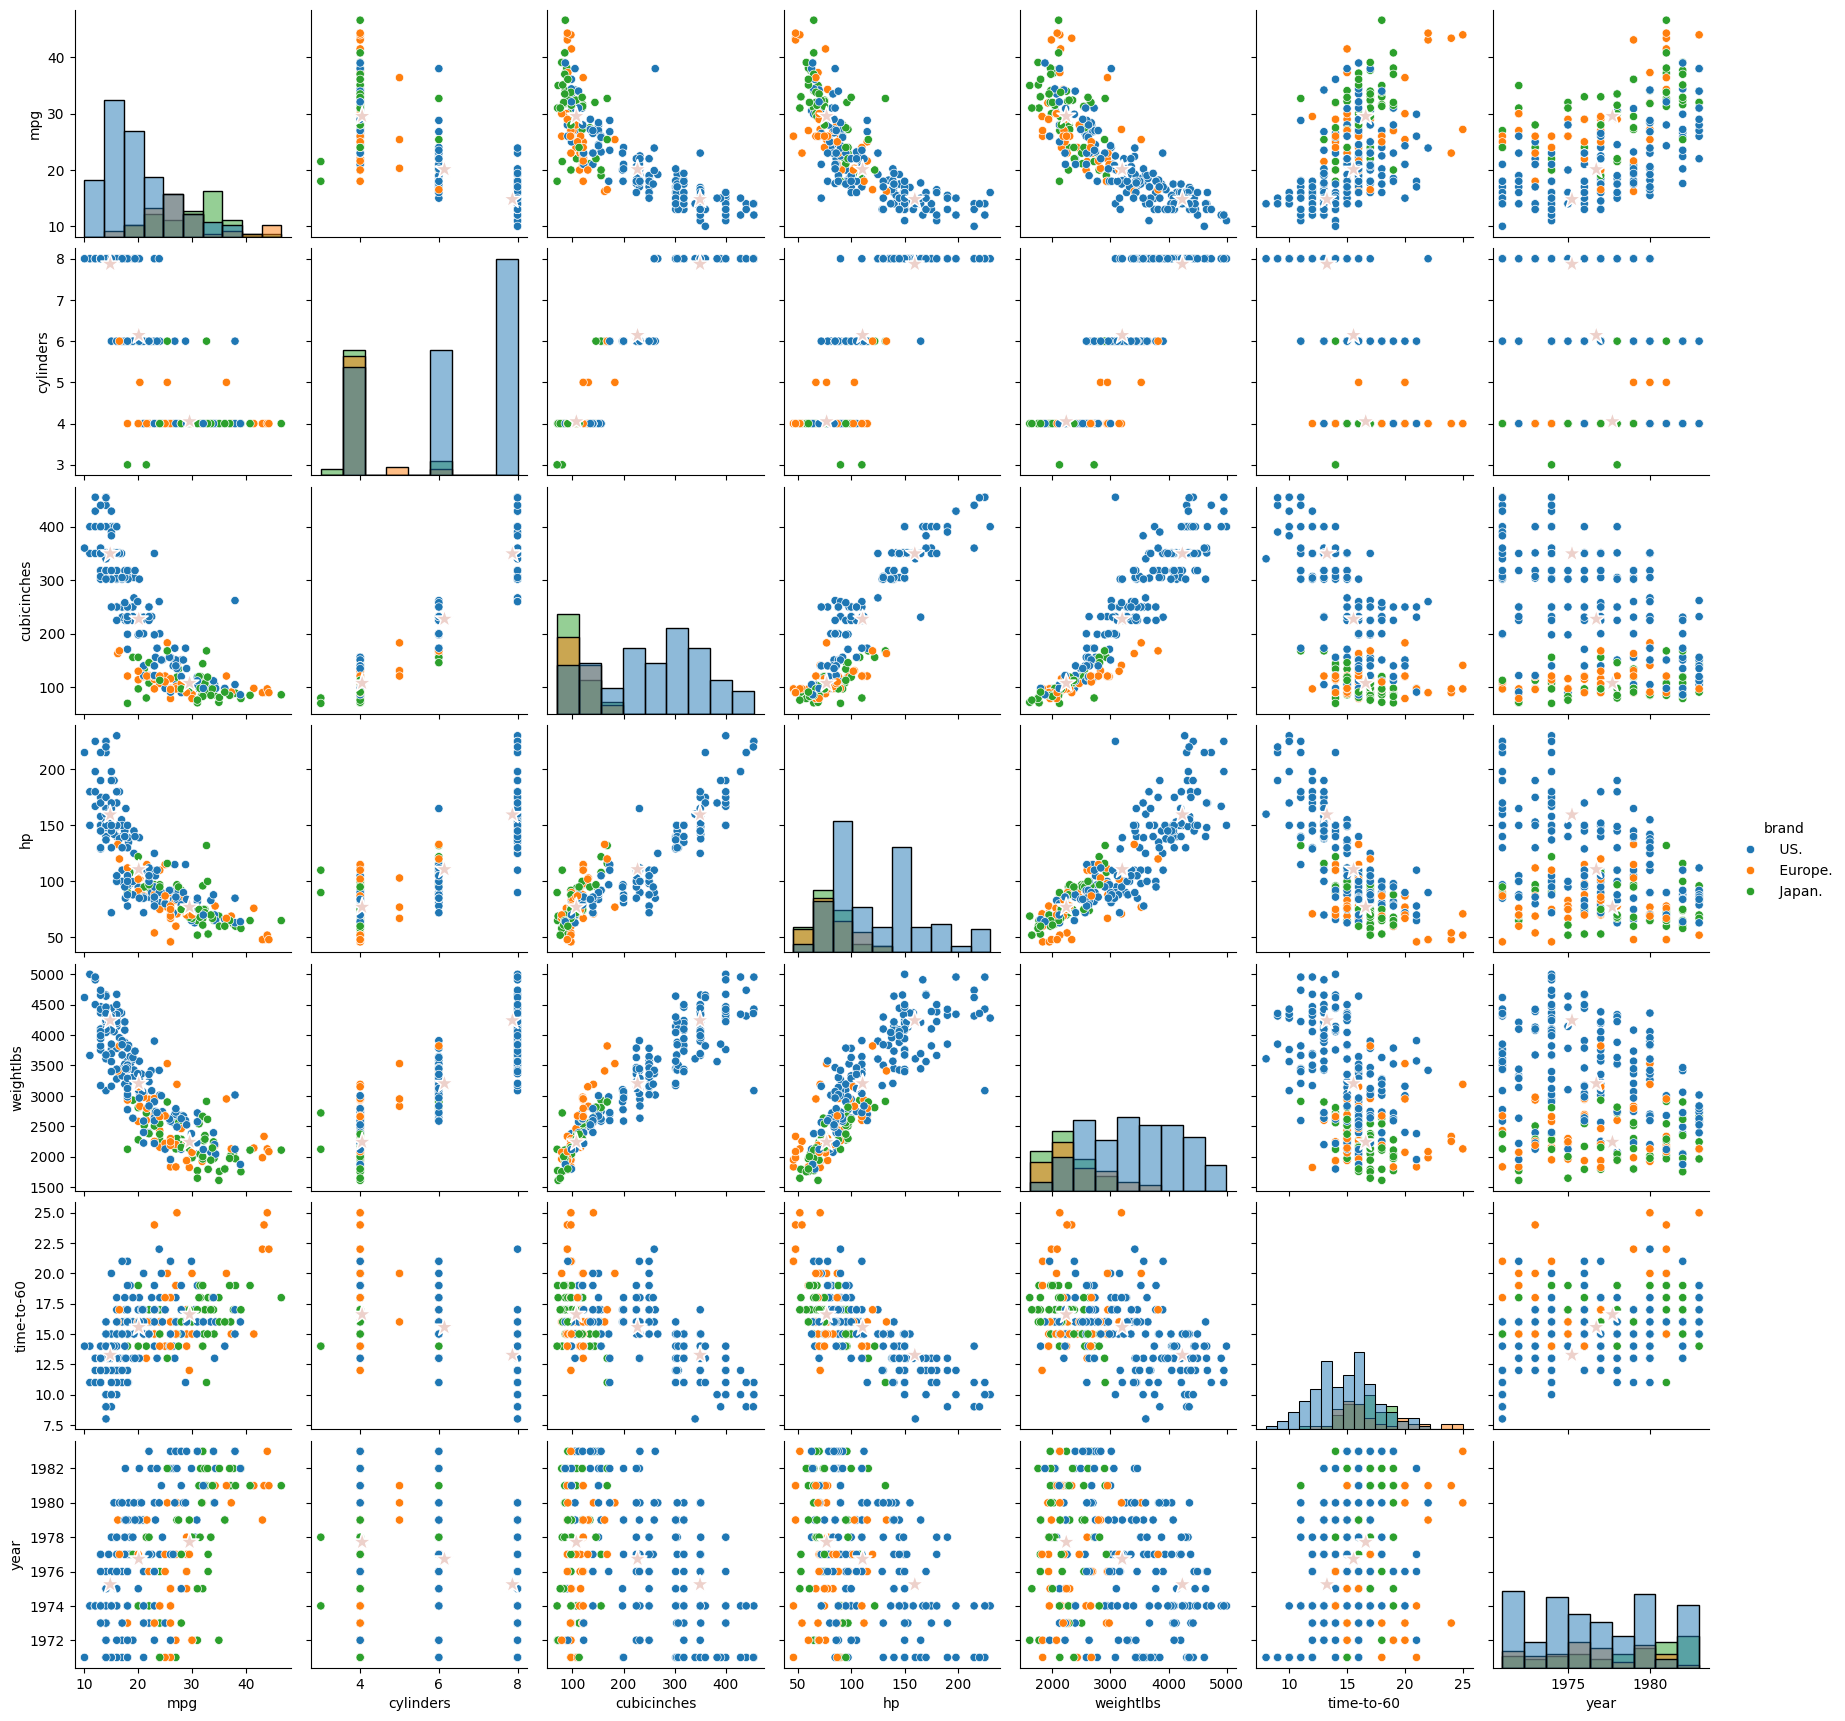

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

data_full = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/cars_label.csv')

data = data_full.drop(columns=['brand'])

# Entrenamiento del modelo
model = KMeans(n_clusters=3, random_state=12345, n_init=10)
model.fit(data)

# Capa extra para los centroides
centroids = pd.DataFrame(model.cluster_centers_, columns=data.columns)

# Trazar el gráfico
pairgrid = sns.pairplot(data_full, hue='brand', diag_kind='hist')
centroids['brand'] = 4
pairgrid.data = centroids
pairgrid.map_offdiag(func=sns.scatterplot, s=200, marker='*', palette='flag')

Hello world!